In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV

In [41]:
file =pd.read_csv(r'C:\Users\Neha Nichani\Desktop\Prerna Data Science\KaggleDataSets\CarPrice.csv',encoding='utf8')

In [42]:
file.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
file.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
file.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
for col in file.select_dtypes(include='object').columns:
    print("Number of unique values in {} are {}".format(col, file[col].nunique()))


Number of unique values in CarName are 147
Number of unique values in fueltype are 2
Number of unique values in aspiration are 2
Number of unique values in doornumber are 2
Number of unique values in carbody are 5
Number of unique values in drivewheel are 3
Number of unique values in enginelocation are 2
Number of unique values in enginetype are 7
Number of unique values in cylindernumber are 7
Number of unique values in fuelsystem are 8


In [230]:
file.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [246]:
file['doornumber']=file['doornumber'].str.replace('two','2')
file['doornumber']=file['doornumber'].str.replace('four','4')

In [247]:
file['doornumber'] = pd.to_numeric(file['doornumber'],errors='coerce')

In [248]:
file['cylindernumber']=file['cylindernumber'].str.replace('four','4')
file['cylindernumber']=file['cylindernumber'].str.replace('six','6')
file['cylindernumber']=file['cylindernumber'].str.replace('five','5')
file['cylindernumber']=file['cylindernumber'].str.replace('three','3')
file['cylindernumber']=file['cylindernumber'].str.replace('twelve','12')
file['cylindernumber']=file['cylindernumber'].str.replace('two','2')
file['cylindernumber']=file['cylindernumber'].str.replace('eight','8')
file['cylindernumber'] = pd.to_numeric(file['cylindernumber'],errors='coerce')

In [8]:
file['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [46]:
file['Brand'] = file['CarName'].apply(lambda x: x.split(" ")[0])

In [48]:
file['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [50]:
file['Brand'] = file['Brand'].str.replace("toyouta","toyota")
file['Brand'] = file['Brand'].str.replace("vw","volkswagen")
file['Brand'] = file['Brand'].str.replace("vokswagen","volkswagen")

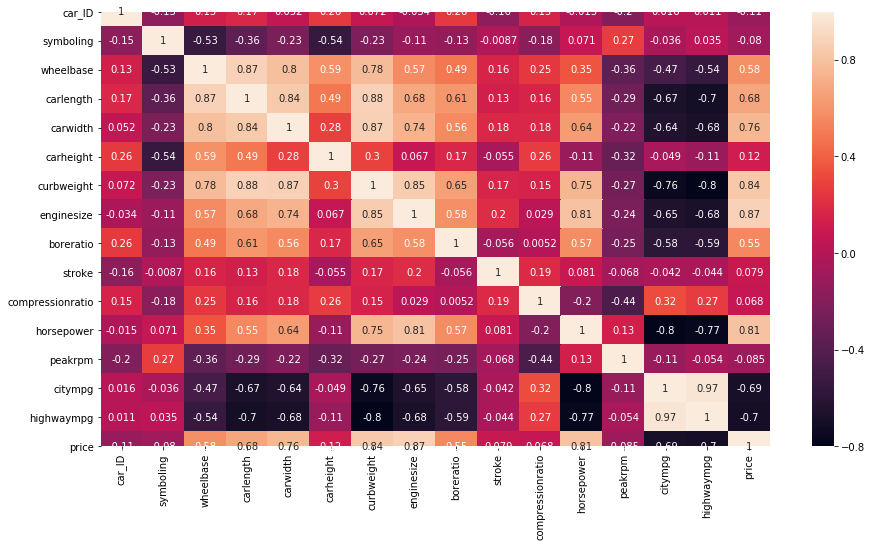

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(file.corr(), annot=True)

In [54]:
file.drop(['car_ID','peakrpm','compressionratio','stroke','carheight','CarName','enginelocation'],axis=1,inplace=True)

In [55]:
cat_vars=file.select_dtypes(['object']).columns

cat_vars

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber', 'fuelsystem', 'Brand'],
      dtype='object')

In [56]:
for col in cat_vars:
    dummy=pd.get_dummies(file[col],drop_first=True,prefix=col)
    file=pd.concat([file,dummy],axis=1)
    del file[col]
    print(col)
del dummy

fueltype
aspiration
doornumber
carbody
drivewheel
enginetype
cylindernumber
fuelsystem
Brand


# DATA
1. X, y (X = Features, y=Target)
2. X_train , y_train --> Training Data --> Fit model on this
3. X_test, y_test --> Testing data --> predict(X_test)
4. Evaluate --> (y_test, preds)

In [57]:
X = file.drop(columns=["price"],axis=1)
Y = file["price"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((164, 62), (41, 62), (164,), (41,))

In [58]:
lm=LinearRegression()

In [59]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
predicted_ir=lm.predict(X_test)
MAE=mean_absolute_error(y_test,predicted_ir)
MAE

1784.0445070045712

In [258]:
list(zip(x_train.columns,lm.coef_))

[('symboling', 766.7384350556357),
 ('doornumber', 1554.7740700274521),
 ('wheelbase', 356.67245909142514),
 ('carlength', -105.80278255684254),
 ('carwidth', 438.96712739686836),
 ('carheight', -647.9621159794551),
 ('curbweight', 13.941559313373887),
 ('cylindernumber', -4189.251764081275),
 ('enginesize', 34.14698343296686),
 ('boreratio', -4248.659518201463),
 ('stroke', -321.9003547334276),
 ('compressionratio', -2365.4515063213958),
 ('horsepower', -68.62772447666589),
 ('peakrpm', 4.525829315907572),
 ('citympg', 329.0101560307835),
 ('highwaympg', -97.80028390757025),
 ('CarName_alfa-romero Quadrifoglio', 2.2725998860551044e-10),
 ('CarName_alfa-romero giulia', -7327.633726052917),
 ('CarName_alfa-romero stelvio', -8.776623872108757e-11),
 ('CarName_audi 100 ls', 191.2864734211927),
 ('CarName_audi 100ls', -2655.4623465646378),
 ('CarName_audi 4000', 2386.128126005429),
 ('CarName_audi 5000', 372.20663807076323),
 ('CarName_audi 5000s (diesel)', -2128.6191991719847),
 ('CarName

In [94]:
lambdas=np.linspace(0,10,100)

In [95]:
params={'alpha':lambdas}

In [96]:
ridge_model=Ridge(fit_intercept=True)

In [97]:
grid_search_rd=GridSearchCV(ridge_model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [98]:
grid_search_rd.fit(X_train,y_train)

C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111...
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', 

In [100]:
grid_search_rd.best_estimator_

Ridge(alpha=0.10101010101010101, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [101]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [102]:
report(grid_search_rd.cv_results_,3)

Model with rank: 1
Mean validation score: -1623.956 (std: 331.599)
Parameters: {'alpha': 0.10101010101010101}

Model with rank: 2
Mean validation score: -1627.181 (std: 331.209)
Parameters: {'alpha': 0.20202020202020202}

Model with rank: 3
Mean validation score: -1639.307 (std: 324.134)
Parameters: {'alpha': 0.30303030303030304}



In [109]:
lambdas=np.linspace(0,20,50)

In [110]:
model1=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [111]:
grid_search_cv=GridSearchCV(model1,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [112]:
grid_search_cv.fit(X_train,y_train)

C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106909984.25522158, tolerance: 936821.6198493199
  positive)
C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, *

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897...
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absol

In [113]:
lasso_model=grid_search_cv.best_estimator_
lasso_model

Lasso(alpha=5.3061224489795915, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [115]:
report(grid_search_cv.cv_results_,3)

Model with rank: 1
Mean validation score: -1614.674 (std: 288.568)
Parameters: {'alpha': 5.3061224489795915}

Model with rank: 2
Mean validation score: -1614.887 (std: 289.357)
Parameters: {'alpha': 5.714285714285714}

Model with rank: 3
Mean validation score: -1616.274 (std: 290.818)
Parameters: {'alpha': 4.8979591836734695}



In [117]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=5.3061224489795915, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
predicted_ir=lasso_model.predict(X_test)
MAE=mean_absolute_error(y_test,predicted_ir)
MAE

1999.2015049783342

In [128]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = 200,2000,100

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 110, 11]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': (200, 2000, 100),
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 110, 11, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [130]:
# Use the random grid to search for best hyperparameters



# First create the base model to tune 
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.7min finished
C:\Users\Neha Nichani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...r

In [131]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [132]:
#Running RandomForestRegressor with best parameters

rf = RandomForestRegressor(n_estimators=200, bootstrap=False, max_depth=110, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)

In [133]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=110,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [134]:
predicted_ir=rf.predict(X_test)
MAE=mean_absolute_error(y_test,predicted_ir)
MAE

1404.8274512195123